# 4.1 Zeitreihenschätzung Arbeitslosenrate USA

In [1]:
source("util.R")
suppressMessages({library(fpp3)})
suppressMessages({library(forecast)})

## Zeitreihe Arbeitslosenrate
Die Originaldaten stammen aus der Online Datenbank [Federal Reserve Economic Data (FRED)](https://fred.stlouisfed.org/) der Federal Reserve Bank of St Louis.
Das Paket [fpp3](https://cran.r-project.org/web/packages/fpp3/) stellt diese als *tsibble* Datenstruktur `us_change` zur Verfügung

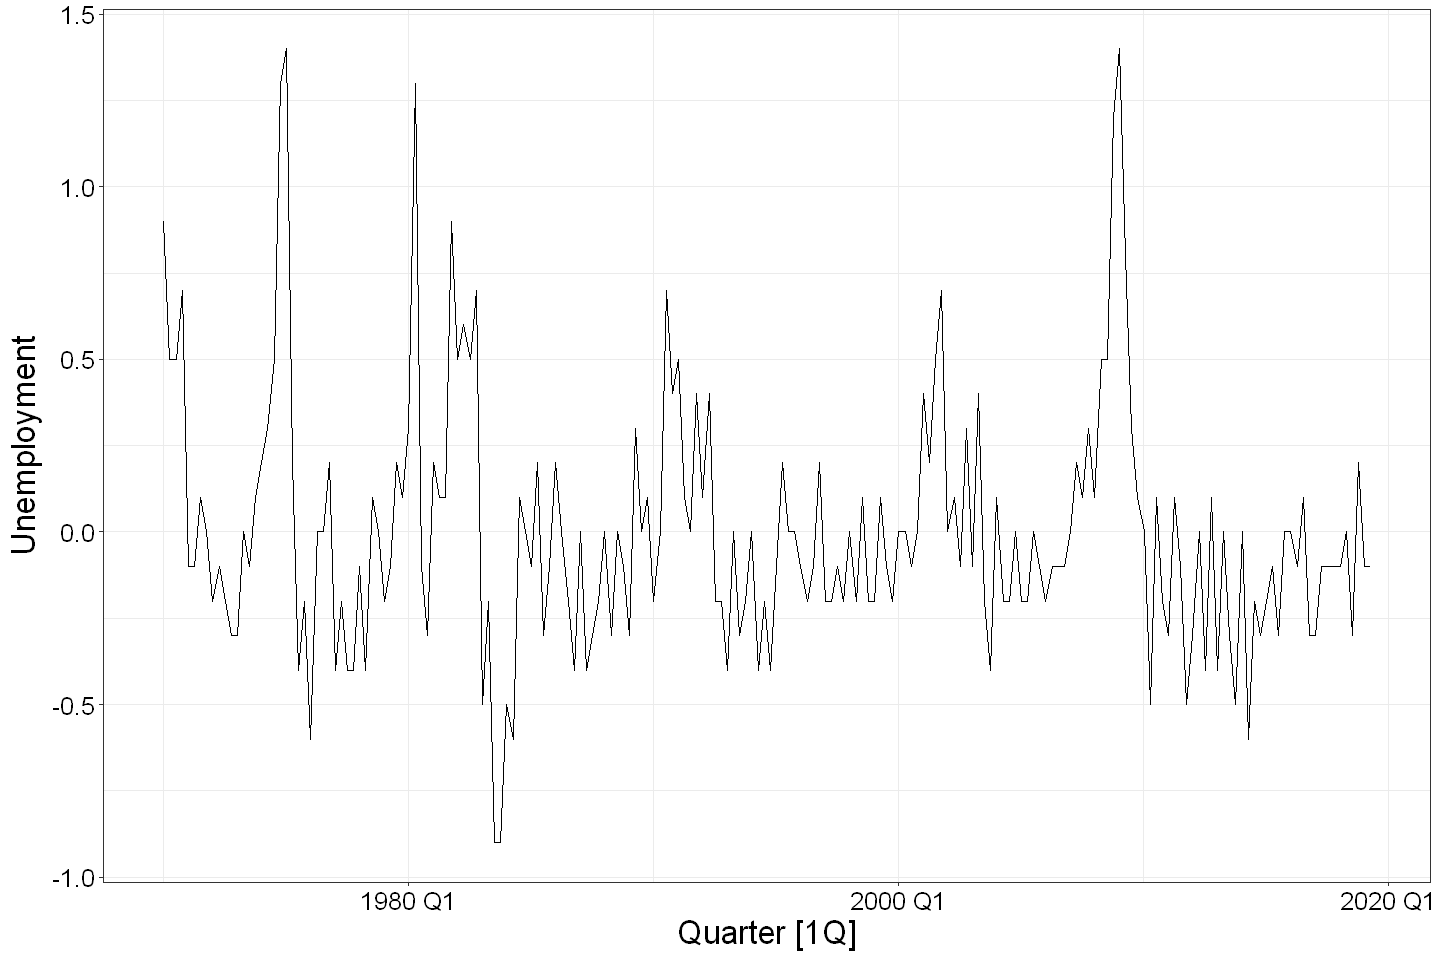

In [2]:
options(repr.plot.width=12, repr.plot.height=8)

unemployment_ts_plot <- us_change |> autoplot(Unemployment)
print(unemployment_ts_plot + theme_jupyter(axis_title_size=20))

## Schätzung Zeitreihenmodell
Die Routine `ARIMA` bestimmt das beste Zeitreihenmodell basierend auf den Informationskriterien AIC oder BIC

In [3]:
fit_unemployment <- us_change |> model(ARIMA(Unemployment))

Geschätztes Modell

In [4]:
report(fit_unemployment)

Series: Unemployment 
Model: ARIMA(0,0,3)(1,0,2)[4] 

Coefficients:
         ma1     ma2     ma3    sar1     sma1     sma2
      0.4543  0.5034  0.3661  0.2503  -0.2459  -0.2459
s.e.  0.0724  0.0776  0.0769  0.2377   0.2322   0.0722

sigma^2 estimated as 0.08492:  log likelihood=-34.5
AIC=83   AICc=83.59   BIC=106.02


## Residuen des Modell

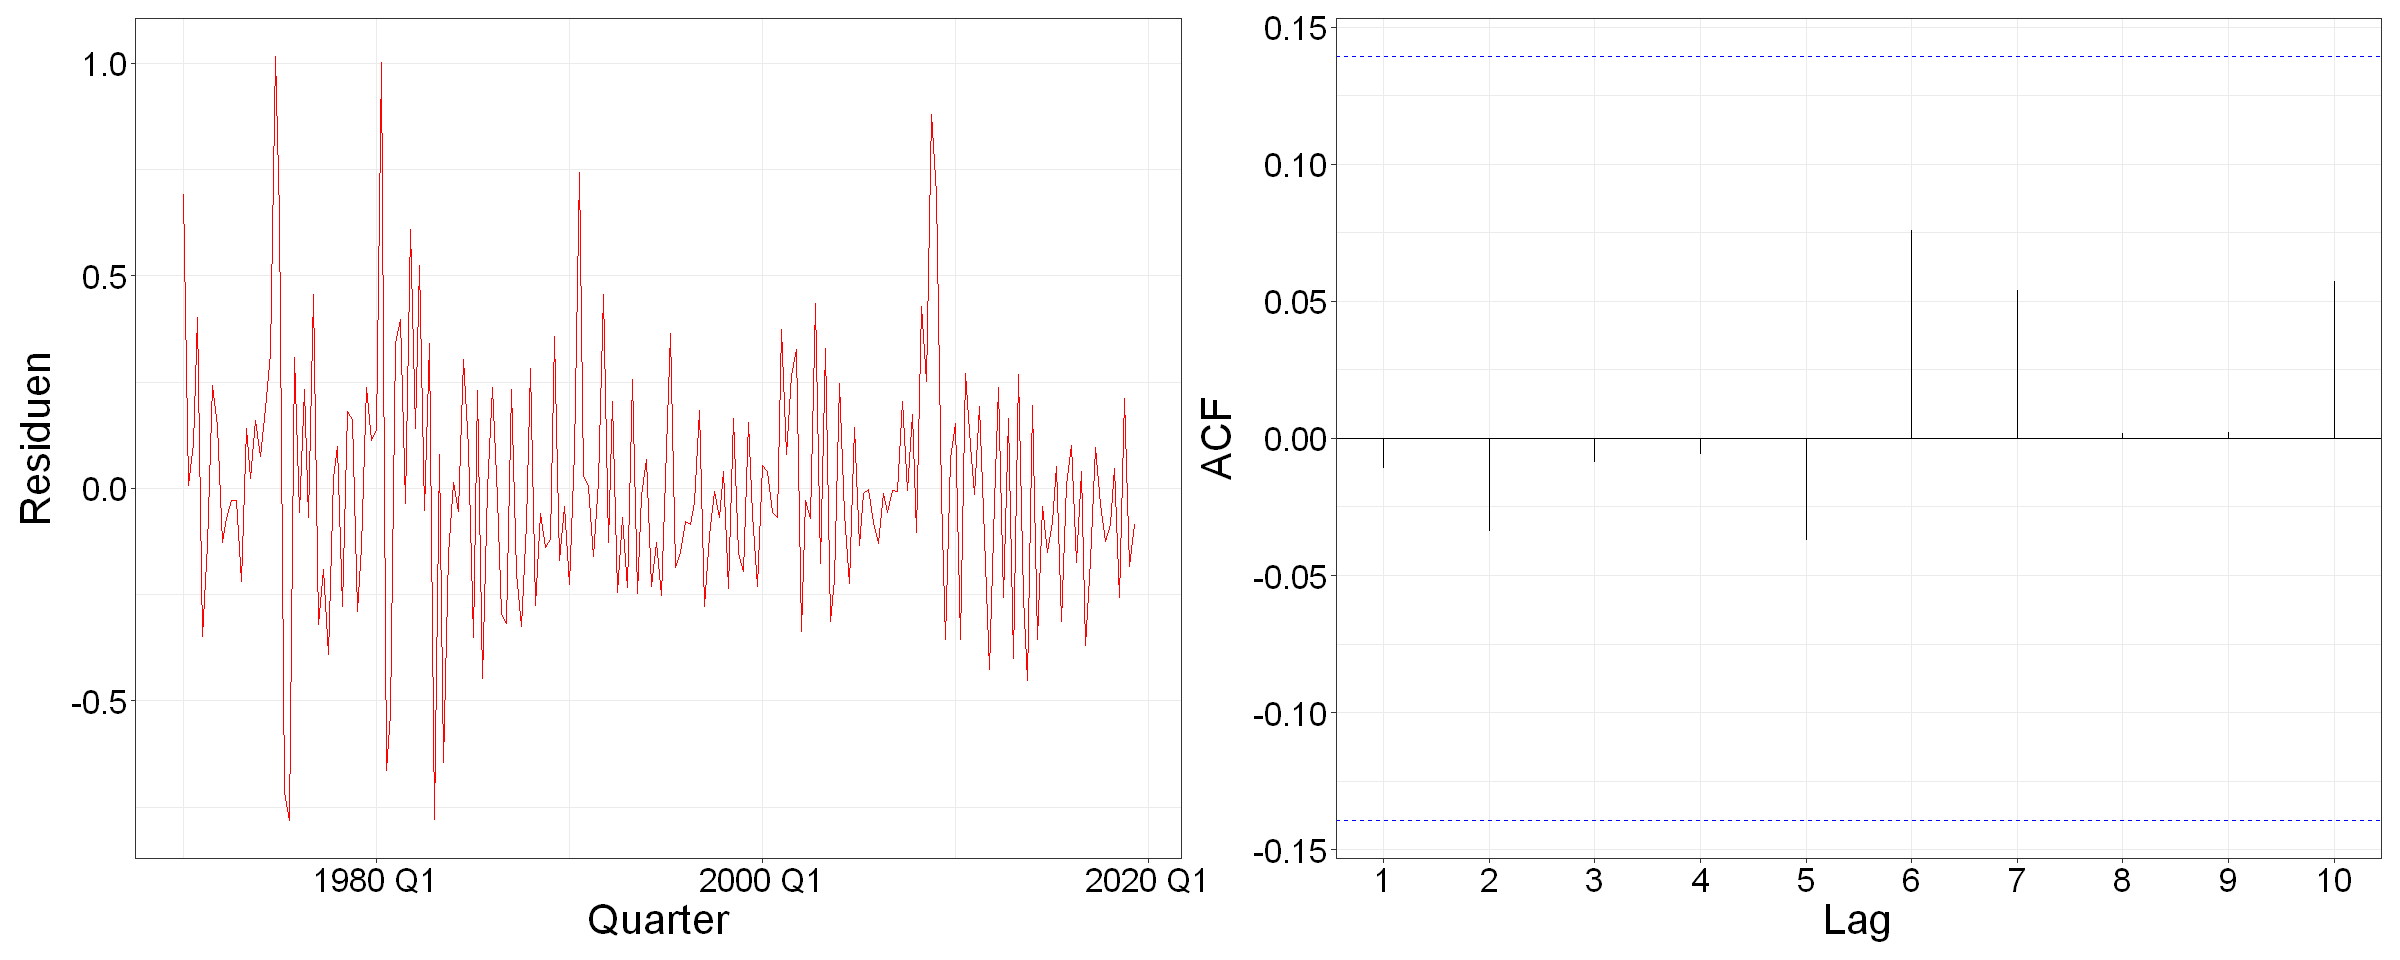

In [5]:
options(repr.plot.width=20, repr.plot.height=8)

residuals <- residuals(fit_unemployment)

residuals_ts_plot <- ggplot(residuals, aes(x = Quarter, y = .resid)) +
                     geom_line(color = "red") +
                     xlab("Quarter") +
                     ylab("Residuen") +
                     theme_jupyter()

acf_plot <- ggAcf(residuals$.resid, lag.max = 10) +
            ggtitle(NULL) +
            theme_jupyter()

residuals_plot <- residuals_ts_plot | acf_plot
print(residuals_plot)

## Q-Q Plot Residuen

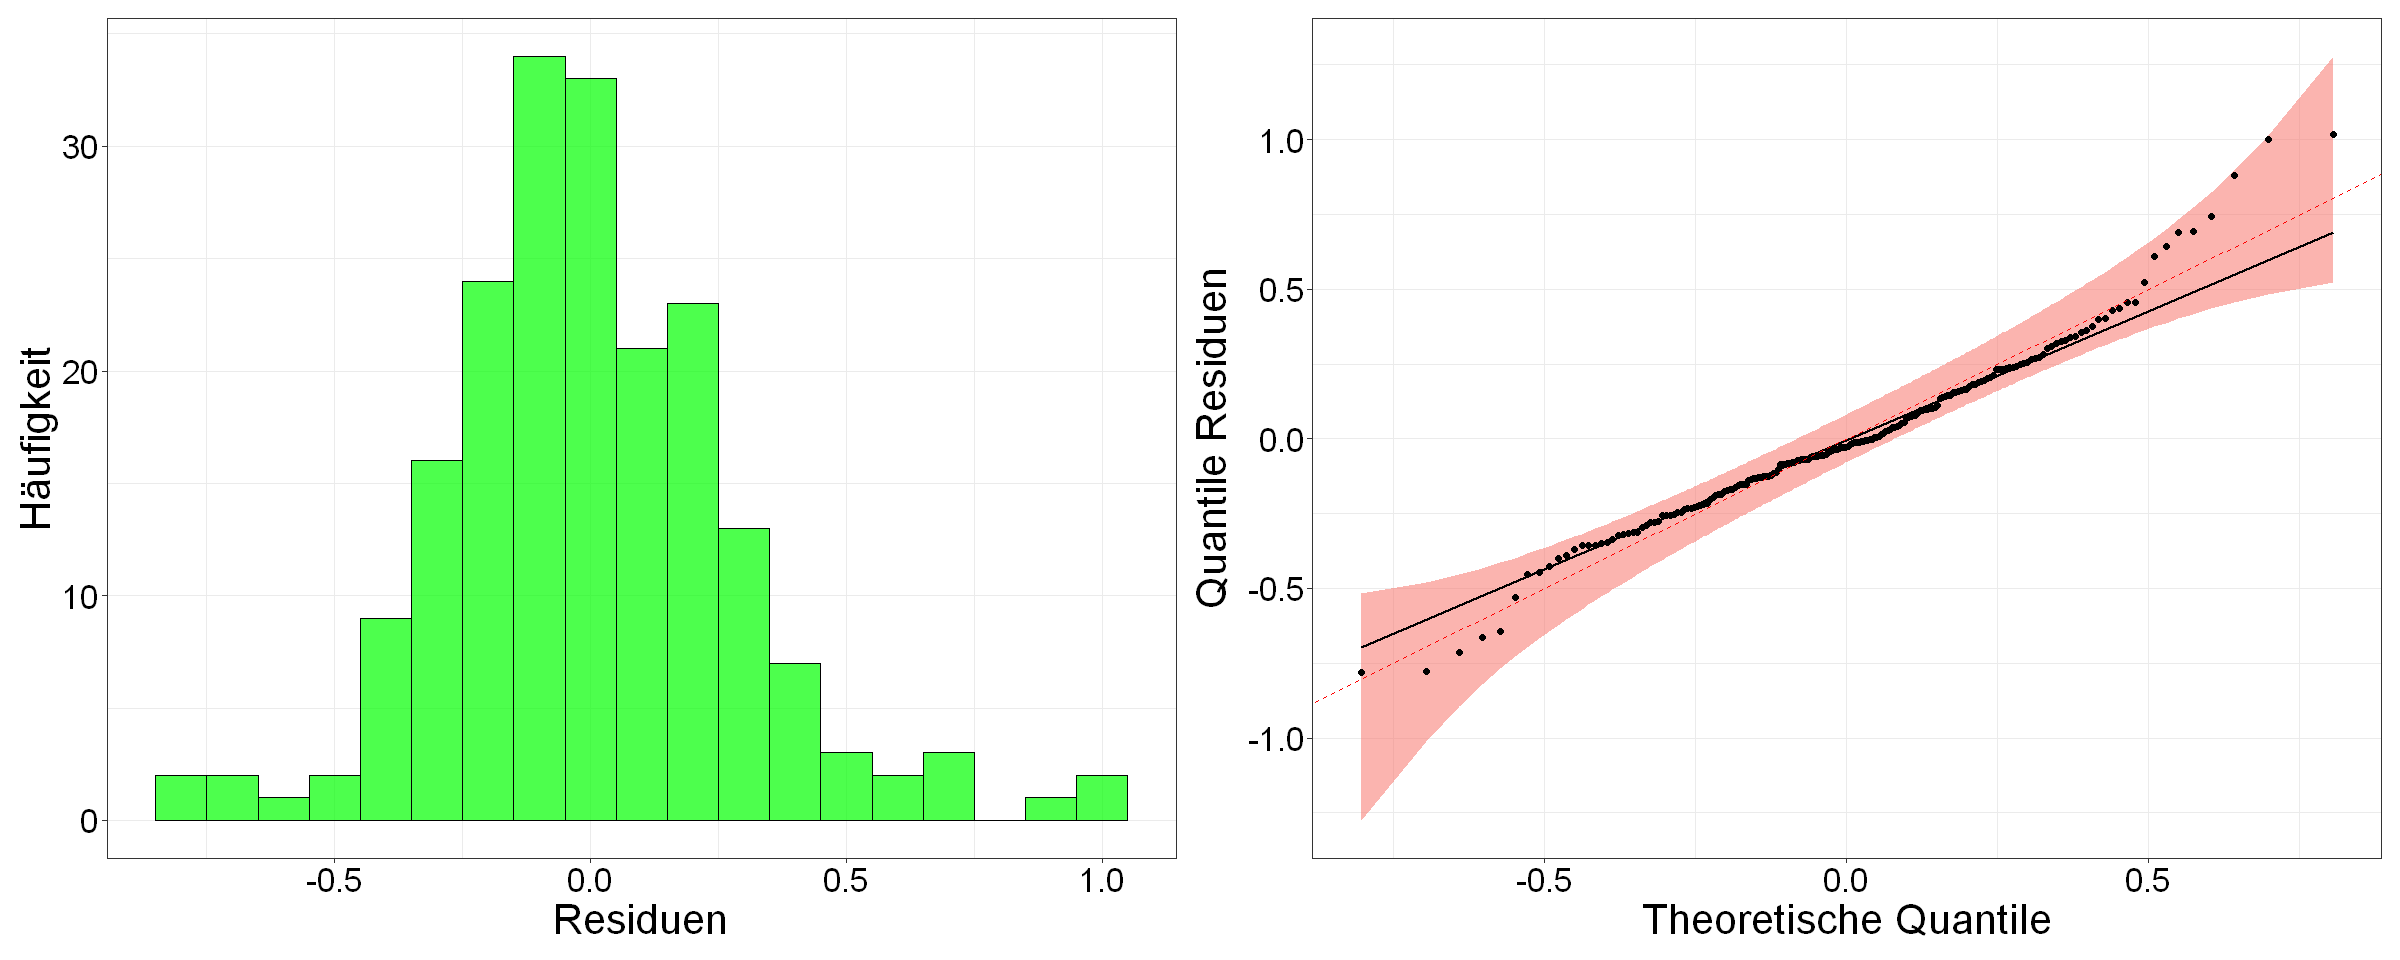

In [6]:
hist_plot <- ggplot(residuals, aes(x = .resid)) +
             geom_histogram(binwidth = 0.1, fill = "green", color = "black", alpha = 0.7) +
             xlab("Residuen") +
             ylab("Häufigkeit") +
             theme_jupyter()

qqplot <- ggplot(residuals, aes(sample = .resid)) +
                 stat_qq_band(bandType = "ell", mapping = aes(fill = "red", alpha = 0.5), show.legend = FALSE) +
                 stat_qq_point() +
                 stat_qq_line() +
                 geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed") +
                 xlab("Theoretische Quantile") +
                 ylab("Quantile Residuen") +
                 theme_jupyter()

residuals_qqplot <- hist_plot | qqplot
print(residuals_qqplot)